# Домашнее задание 1 "Основы статистики"

# 1.2 
$(X_1, ..., X_n) - U[0,\theta]$
Оценки: $a = 2 \overline{X}, b = \frac{n+1}{n}X_{(n)}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N_samp = 200
N_size = 10000
theta = np.logspace(-1,3,5)

Samples = []

for th in theta:
    s = []
    for i in range(N_samp):
        s.append(np.random.uniform(0,th, N_size))
    Samples.append(s)
    

In [3]:
def quad_a(samp, theta):
    ret = np.empty(N_size)
    for i in range(N_size):
        ret[i] = (2*np.mean(samp[:i+1]) - theta)**2
    return ret
        
def quad_b(samp, theta):
    ret = np.empty(N_size)
    for i in range(N_size):
        ret[i] = ((i+2)/(i+1) *(np.amax(samp[:i+1]))- theta) ** 2
    return ret
        
def quad_av(samp, theta, quad):
    ret = np.zeros(N_size)
    for i in range(N_samp):
        ret += quad(samp[i],theta)
    return ret / N_samp

In [4]:
q_a = []
q_b = []

for i in range(len(theta)):
    q_a.append(quad_av(Samples[i], theta[i], quad_a))
    q_b.append(quad_av(Samples[i], theta[i], quad_b))


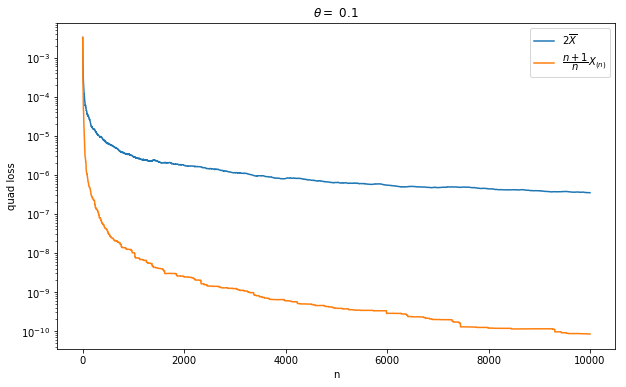

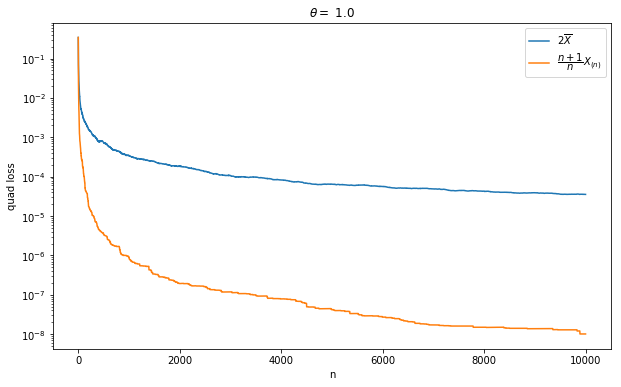

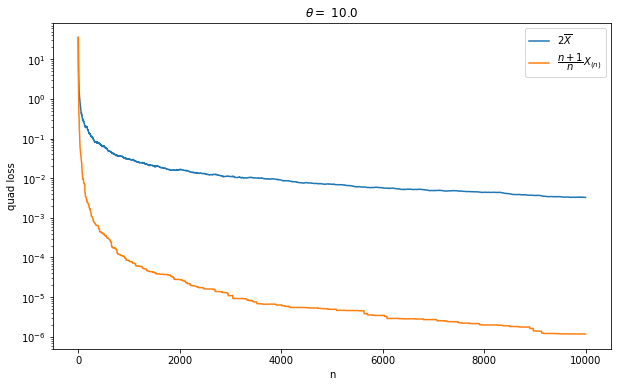

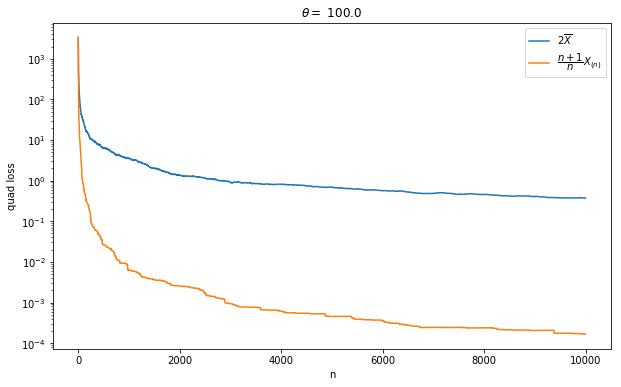

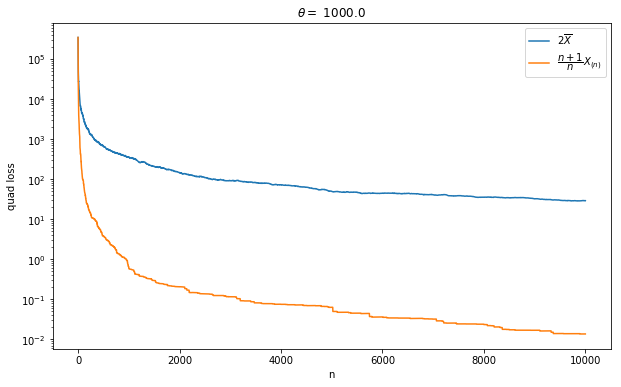

In [5]:
for i in range(len(theta)):
    plt.figure(figsize=(10, 6))
    plt.semilogy(range(N_size), q_a[i], label = "$2 \\overline{X}$")
    plt.semilogy(range(N_size), q_b[i], label =  "$\\dfrac{n+1}{n}X_{(n)}$")
    plt.xlabel('n')
    plt.ylabel('quad loss')
    plt.title('$\\theta =$ {}'.format(theta[i]))
    plt.legend()
    plt.show()


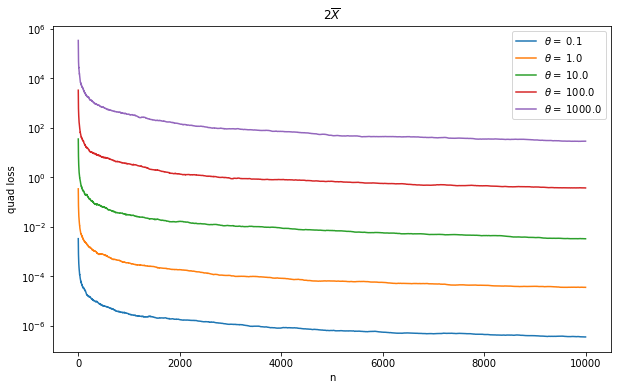

In [6]:
plt.figure(figsize=(10, 6))
plt.title("$2 \\overline{X}$")
for i in range(len(theta)):
    plt.semilogy(range(N_size), q_a[i], label = '$\\theta =$ {}'.format(theta[i]))
    plt.xlabel('n')
    plt.ylabel('quad loss')
    plt.legend()
plt.show()

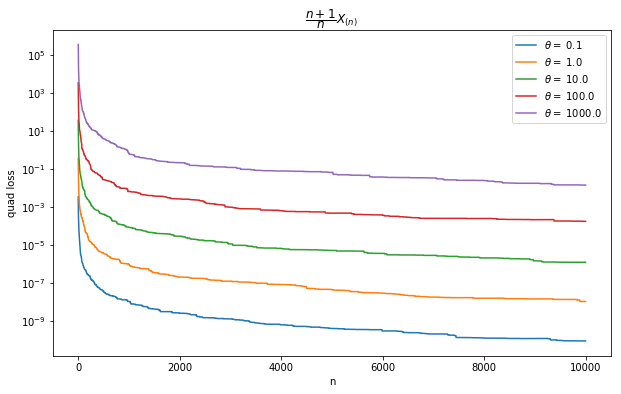

In [7]:
plt.figure(figsize=(10, 6))
plt.title("$\\dfrac{n+1}{n}X_{(n)}$")
for i in range(len(theta)):
    plt.semilogy(range(N_size), q_b[i], label = '$\\theta =$ {}'.format(theta[i]))
    plt.xlabel('n')
    plt.ylabel('quad loss')
    plt.legend()
plt.show()

Вывод: сравнил, вторая оценка лучше

# 1.3

In [8]:
Samples_2 = []

for th in theta:
    Samples_2.append(np.random.uniform(0,th, N_size))

In [9]:
def ass_a(samp, theta):
    ret = np.empty(N_size)
    for i in range(N_size):
        ret[i] = np.abs(2*np.mean(samp[:i+1]) - theta)
    return ret
        
def ass_b(samp, theta):
    ret = np.empty(N_size)
    for i in range(N_size):
        ret[i] = np.abs((i+2)/(i+1) *(np.amax(samp[:i+1])) - theta)
    return ret

def ass_c(samp, theta):
    ret = np.empty(N_size)
    for i in range(N_size):
        ret[i] = np.abs(np.amax(samp[:i+1]) + np.amin(samp[:i+1]) - theta)
    return ret

In [10]:
ass_a_arr = []
ass_b_arr = []
ass_c_arr = []

for i in range(len(theta)):
    ass_a_arr.append(ass_a(Samples_2[i], theta[i]))
    ass_b_arr.append(ass_b(Samples_2[i], theta[i]))
    ass_c_arr.append(ass_c(Samples_2[i], theta[i]))

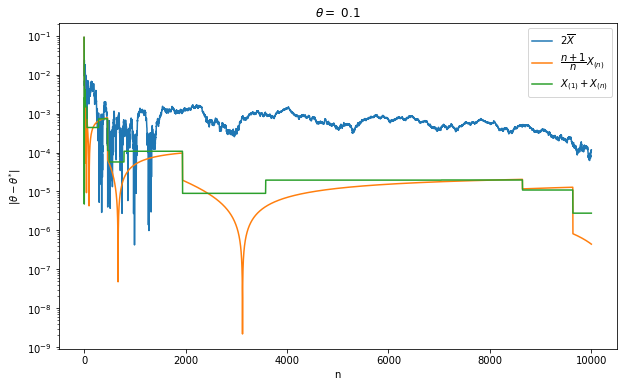

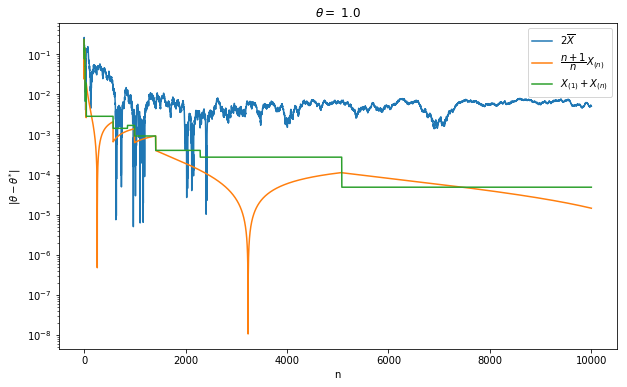

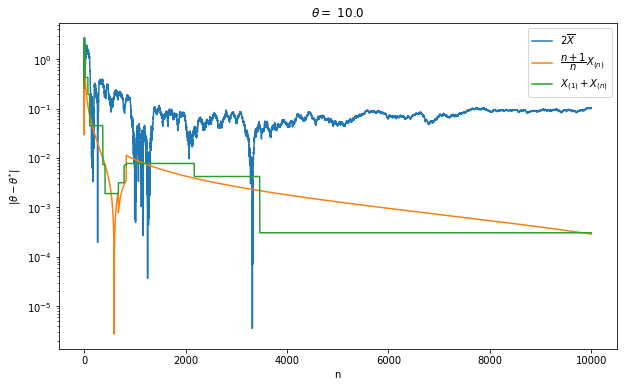

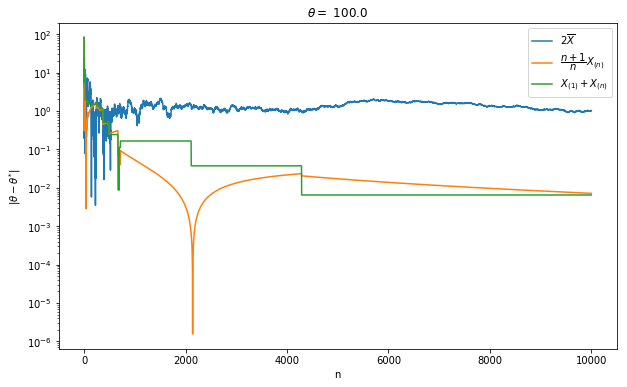

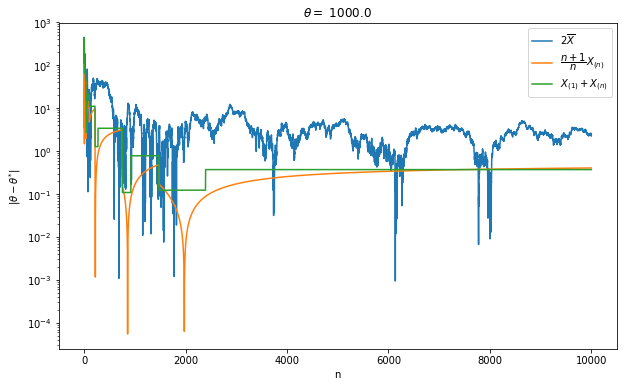

In [11]:
for i in range(len(theta)):
    plt.figure(figsize=(10, 6))
    plt.semilogy(range(N_size), ass_a_arr[i], label = "$2 \\overline{X}$")
    plt.semilogy(range(N_size), ass_b_arr[i], label =  "$\\dfrac{n+1}{n}X_{(n)}$")
    plt.semilogy(range(N_size), ass_c_arr[i], label =  "$X_{(1)} + X_{(n)}$")
    plt.xlabel('n')
    plt.ylabel('$ | \\theta - \\theta^{*}|$')
    plt.title('$\\theta =$ {}'.format(theta[i]))
    plt.legend()
    plt.show()

Наверное, оценка $X_{(1)} + X_{(n)}$ будет лучше остальных

$\dfrac{n+1}{n}X_{(n)}$ лучше, чем $2 \overline{X}$